In [1]:
%pylab inline
import sys
sys.path.append('..\..')
from genx import api

Populating the interactive namespace from numpy and matplotlib
'Plugin' object has no attribute 'data'


In [2]:
model,optimizer=api.load('SuperAdam_SiO_full_res_calc.hgx')

Genx Model - compiled
File: C:\Users\artur\Documents\genx\genx\genx\examples\SuperAdam_SiO_full_res_calc.hgx
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setD         1205.0           True             903.75           1506.25          -               
           SiO.setB         15.755099999999999 True             11.816324999999999 19.693875        -               
           SiO.setSigma     2.0              True             1.5              15.0             -               
           Sub.setSigma     2.0              True             1.5              15.0             -               
           inst.setI0       2.0              True             1.5              15.0             -               
           inst.setBeamw    0.2              True             0.15000000000000002 1.5              -               
           inst.setIbkg     0.0              True             0.0              1e-05            -               
           cp.setDlol       0.007            True             0.00525          0.00875          -               
           cp.setDtheta     0.04             True             0.03             0.05             -               
           inst.setTthoff   0.0              True             -0.05            0.05             -               
DataList([
           DataSet(name=SiO ref        , show=True, use=True, error=True),
           ])
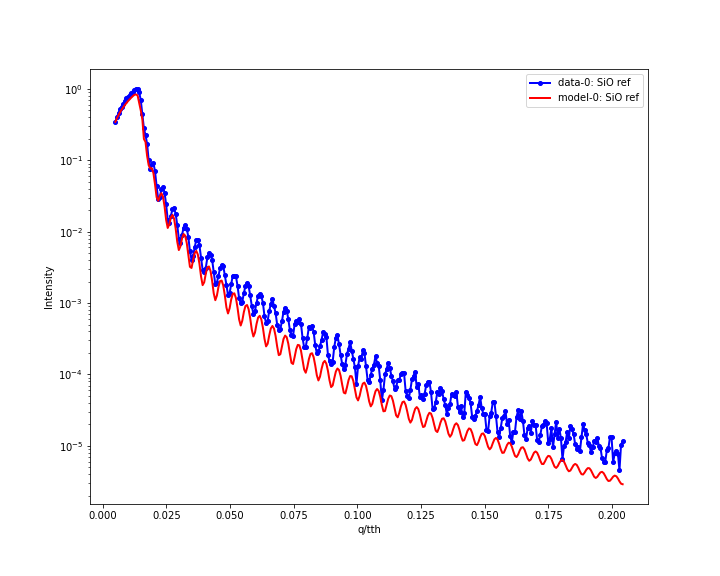

In [3]:
model

In [4]:
from IPython.display import Code
Code(model.script, language='python')

import models.spec_nx as model
from models.utils import UserVars, fp, fw, bc, bw
from numpy import *

# BEGIN Instrument DO NOT CHANGE
inst = model.Instrument(footype = 'gauss beam',probe = 'neutron',beamw = 0.2,resintrange = 2,tthoff = 0.0,pol = 'uu',wavelength = 4.4,respoints = 5,Ibkg = 0.0,I0 = 2,samplelen = 50.0,restype = 'full conv and varying res.',coords = 'q',res = 0.001,incangle = 0.0)
fp.set_wavelength(inst.wavelength)
#Compability issues for pre-fw created gx files
try:
	 fw
except:
	pass
else:
	fw.set_wavelength(inst.wavelength)
# END Instrument

# BEGIN Sample DO NOT CHANGE
Amb = model.Layer(b = 0, d = 0.0, f = (1e-20+1e-20j), dens = 1.0, magn_ang = 0.0, sigma = 0.0, xs_ai = 0.0, magn = 0.0)
SiO = model.Layer(b = bc.Si + bc.O*2, d = 1205, f = (1e-20+1e-20j), dens = 0.026, magn_ang = 0.0, sigma = 2, xs_ai = 0.0, magn = 0.0)
Sub = model.Layer(b = bc.Si, d = 0.0, f = (1e-20+1e-20j), dens = 8/5.443**3, magn_ang = 0.0, sigma = 2, xs_ai = 0.0, magn = 0.0)

surf = model.Stack(Layers=[SiO], Repetitions = 1)

sample = model.Sample(Stacks = [surf], Ambient = Amb, Substrate = Sub)
# END Sample

# BEGIN Parameters DO NOT CHANGE
cp = UserVars()
cp.new_var('dtheta', 0.04)
cp.new_var('dlol', 0.007)
# END Parameters

def Sim(data):
    I = []
    # BEGIN Dataset 0 DO NOT CHANGE
    inst.setRes(sqrt((cp.dlol*data[0].x)**2 + (4*3.1415/4.4*cp.dtheta*pi/360)**2))
    I.append(sample.SimSpecular(data[0].x, inst))
    # END Dataset 0
    return I

In [5]:
p=model.parameters.append('SiO.setDens', model)
p

Parameter:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setDens      0.026            False            0.0065           0.104            None

In [6]:
p.name, p.value, p.fit, p.min, p.max

('SiO.setDens', 0.026, False, 0.0065, 0.104)

In [7]:
p.fit=True
model.parameters

Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setD         1205.0           True             903.75           1506.25          -               
           SiO.setB         15.755099999999999 True             11.816324999999999 19.693875        -               
           SiO.setSigma     2.0              True             1.5              15.0             -               
           Sub.setSigma     2.0              True             1.5              15.0             -               
           inst.setI0       2.0              True             1.5              15.0             -               
           inst.setBeamw    0.2              True             0.15000000000000002 1.5              -               
           inst.setIbkg     0.0              True             0.0              1e-05            -               
           cp.setDlol       0.007            True             0.00525          0.00875          -               
           cp.setDtheta     0.04             True             0.03             0.05             -               
           inst.setTthoff   0.0              True             -0.05            0.05             -               
           SiO.setDens      0.026            True             0.0065           0.104            None

In [8]:
optimizer.opt.min_parameter_spread=0.1
optimizer

DiffEv Optimizer:
    Fitting:
        use_start_guess=True	use_boundaries=True
        use_autosave=False	autosave_interval=10
        save_all_evals=False	max_log_elements=100000
    Differential Evolution:
        km                             0.6
        kr                             0.6
        create_trial                   best_1_bin
        use_pop_mult=False	pop_mult=3	pop_size=50
        use_max_generations=False	max_generations=500	max_generation_mult=6
        min_parameter_spread           0.1
    Parallel processing:
        use_parallel_processing        False
        parallel_processes             2
        parallel_chunksize             10

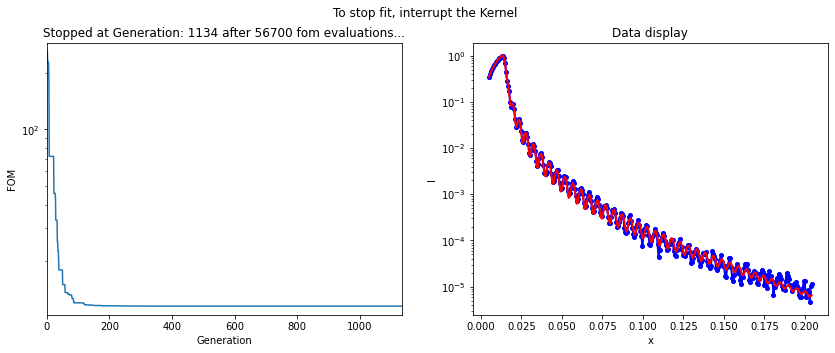

Stopped at Generation: 1134 after 56700 fom evaluations...
If you want to update the model with the fit results, call api.fit_update(model, optimizer)


In [9]:
api.fit_notebook(model, optimizer)

In [10]:
api.fit_update(model, optimizer)

Genx Model - compiled
File: C:\Users\artur\Documents\genx\genx\genx\examples\SuperAdam_SiO_full_res_calc.hgx
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiO.setD         1217.0886301710957 True             903.75           1506.25          -               
           SiO.setB         19.42708456733239 True             11.816324999999999 19.693875        -               
           SiO.setSigma     4.917685177916031 True             1.5              15.0             -               
           Sub.setSigma     4.877455040335174 True             1.5              15.0             -               
           inst.setI0       12.139284509706979 True             1.5              15.0             -               
           inst.setBeamw    1.0009578993752255 True             0.15000000000000002 1.5              -               
           inst.setIbkg     6.863748359657112e-16 True             0.0              1e-05            -               
           cp.setDlol       0.007365076338977101 True             0.00525          0.00875          -               
           cp.setDtheta     0.034910416435372585 True             0.03             0.05             -               
           inst.setTthoff   -0.0359608885586253 True             -0.05            0.05             -               
           SiO.setDens      0.019188651564255435 True             0.0065           0.104            None            
DataList([
           DataSet(name=SiO ref        , show=True, use=True, error=True),
           ])
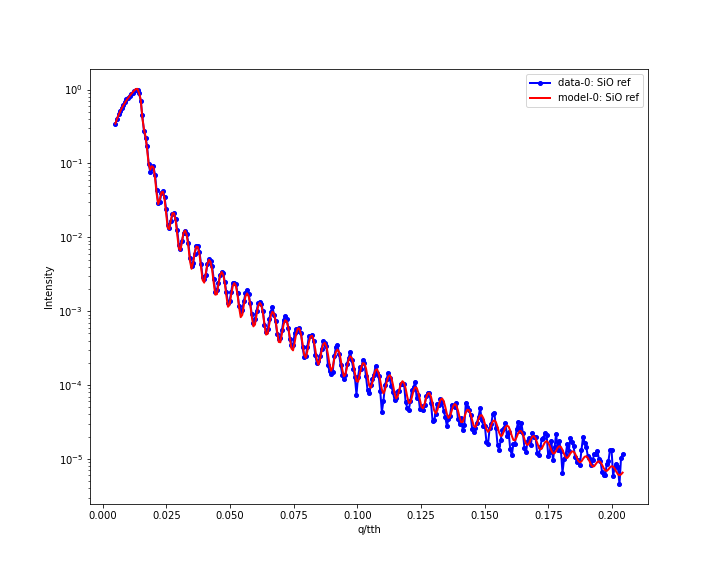

In [11]:
model

In [12]:
#api.save(r'testoutput.hgx', model, optimizer)